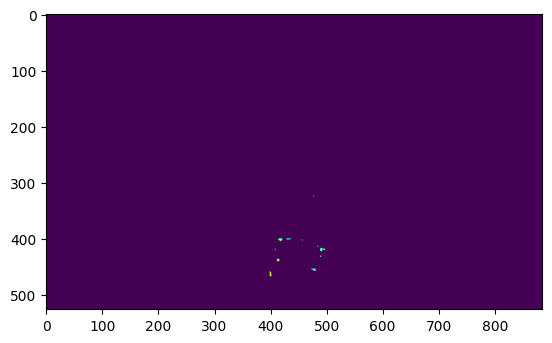

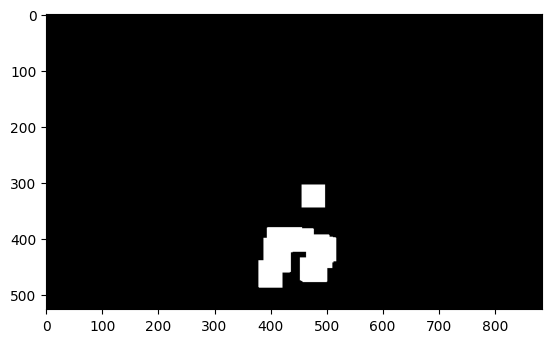

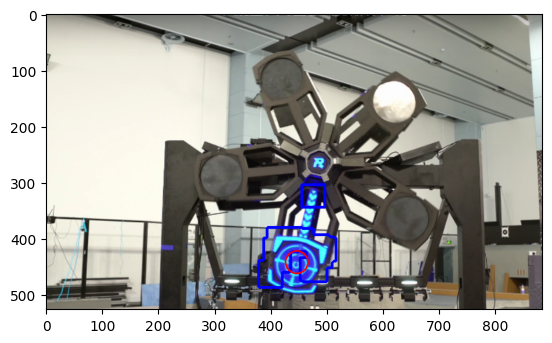

In [38]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# 导入图像(im)
#im = cv.imread('./blue3.png')
#img = cv.imread('./blue3.png')
im = cv.imread('./new2.png')
img = cv.imread('./new2.png')
#转换成HSV图
im = cv.cvtColor(im, cv.COLOR_BGR2HSV)
# 定义im中颜色的范围
#lower_ = np.array([0,113,250])
#upper_ = np.array([93,218,255])
lower_ = np.array([0,181,255])
upper_ = np.array([35,255,255])
# 设置im的阈值使得只取该范围内颜色
mask = cv.inRange(im, lower_, upper_)
 # 将掩膜和图像逐像素相加
im = cv.bitwise_and(im,im, mask= mask)
#使用高斯过滤
im = cv.GaussianBlur(im,(7,7),0)
#转为灰度图并使用阈值
im = cv.cvtColor(im, cv.COLOR_HSV2BGR)
im = cv.cvtColor(im, cv.COLOR_BGR2GRAY)
ret, im = cv.threshold(im,100,255,cv.THRESH_BINARY)
plt.imshow(im)
plt.show()
#扩张
kernel = np.ones((5, 5), np.uint8)
#im = cv.dilate(im, kernel, iterations=3)
im = cv.dilate(im, kernel, iterations=10)
plt.imshow(im,cmap='gray')
plt.show()

contours, hierarchy = cv.findContours(im, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE) #建立外轮廓
max = 0
y = []
cv.drawContours(img,contours,-1,(0,0,255),3)
for cnt in contours:
    (x,y),radius = cv.minEnclosingCircle(cnt)
    center = (int(x),int(y))
    radius = int(radius)
    if radius > max:
        max = radius
        center1 = center
#r = int(max/2)
r = int(max/4)
cv.circle(img,center1,r,(255,0,0),2)


plt.imshow(img)
plt.show()